In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
N = 32
batch = 10000

# Generate random input data and desired output data
sig = np.random.randn(batch, N) + 1j*np.random.randn(batch, N)
F = np.fft.fft(sig, axis=-1)

# First half of inputs/outputs is real part, second half is imaginary part
X = np.hstack([sig.real, sig.imag])
Y = np.hstack([F.real, F.imag])

In [24]:
model = keras.Sequential([layers.Dense(N*2, input_dim=N*2, use_bias=False)])
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=100)

Train on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 78us/sample - loss: 30.2024
Epoch 2/100
10000/10000 [==============================] - 0s 20us/sample - loss: 24.7126s - loss: 2
Epoch 3/100
10000/10000 [==============================] - 0s 20us/sample - loss: 20.0419
Epoch 4/100
10000/10000 [==============================] - 0s 19us/sample - loss: 16.1032
Epoch 5/100
10000/10000 [==============================] - 0s 19us/sample - loss: 12.8102
Epoch 6/100
10000/10000 [==============================] - 0s 20us/sample - loss: 10.0829
Epoch 7/100
10000/10000 [==============================] - 0s 19us/sample - loss: 7.8477
Epoch 8/100
10000/10000 [==============================] - 0s 19us/sample - loss: 6.0354
Epoch 9/100
10000/10000 [==============================] - 0s 19us/sample - loss: 4.5839
Epoch 10/100
10000/10000 [==============================] - 0s 19us/sample - loss: 3.4351
Epoch 11/100
10000/10000 [==============================] - 0s 19us/s

Epoch 89/100
10000/10000 [==============================] - 0s 19us/sample - loss: 2.4753e-12
Epoch 90/100
10000/10000 [==============================] - 0s 19us/sample - loss: 2.2666e-12
Epoch 91/100
10000/10000 [==============================] - 0s 20us/sample - loss: 2.0898e-12
Epoch 92/100
10000/10000 [==============================] - 0s 20us/sample - loss: 1.9341e-12
Epoch 93/100
10000/10000 [==============================] - 0s 21us/sample - loss: 1.7870e-12
Epoch 94/100
10000/10000 [==============================] - 0s 21us/sample - loss: 1.6649e-12
Epoch 95/100
10000/10000 [==============================] - 0s 20us/sample - loss: 1.5421e-12
Epoch 96/100
10000/10000 [==============================] - 0s 20us/sample - loss: 1.4305e-12
Epoch 97/100
10000/10000 [==============================] - 0s 20us/sample - loss: 1.3174e-12
Epoch 98/100
10000/10000 [==============================] - 0s 20us/sample - loss: 1.2290e-12
Epoch 99/100
10000/10000 [==============================] - 

In [25]:
data = np.arange(N)

In [26]:
def ANN_DFT(x):
    if len(x) != N:
        raise ValueError(f'Input must be length {N}')
    pred = model.predict(np.hstack([x.real, x.imag])[np.newaxis])[0]
    result = pred[:N] + 1j*pred[N:]
    return result

In [27]:
ANN = ANN_DFT(data)
FFT = np.fft.fft(data)
print(f'ANN matches FFT: {np.allclose(ANN, FFT)}')

ANN matches FFT: True


<function matplotlib.pyplot.show(*args, **kw)>

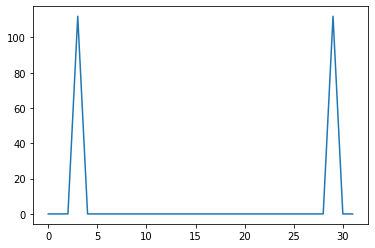

In [45]:
plt.plot(abs(ANN))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

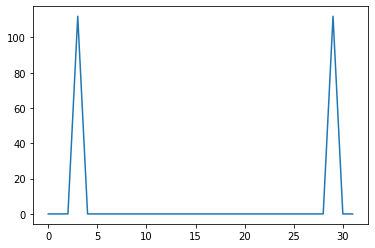

In [46]:
plt.plot(abs(FFT))
plt.show

In [39]:
seno=[7*np.sin(3*2*np.pi*x/32) for x in data]

In [49]:
sena=np.array(seno)
ANN = ANN_DFT(sena)
FFT = np.fft.fft(sena)
print(f'ANN matches FFT: {np.allclose(ANN, FFT, rtol=1e-05, atol=1e-05)}')

ANN matches FFT: True


In [91]:
expo=[7*np.exp(3*1j*2*np.pi*(x)/32+1j*np.pi) for x in data]
FFT=np.fft.fft(expo)

<function matplotlib.pyplot.show(*args, **kw)>

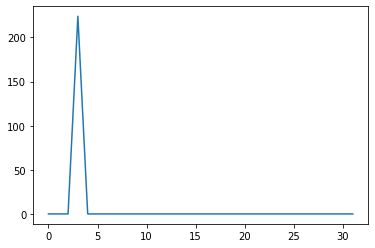

In [92]:
plt.plot(abs(FFT))
plt.show

In [93]:
FFT

array([ 2.36295051e-14+6.97615973e-15j,  2.16746224e-14+1.45933193e-14j,
        2.25596980e-14+4.35412193e-15j, -2.24000000e+02+1.24757255e-13j,
       -2.06724548e-14+2.82505506e-15j, -2.10367158e-14+2.17845274e-14j,
       -2.17671740e-14+7.68248053e-15j,  1.58576683e-14+9.46002353e-15j,
       -4.05413857e-14+1.51918101e-14j, -2.52070347e-14-3.87472589e-14j,
        3.32677509e-14+5.34317211e-15j, -9.63567642e-16+2.89762101e-14j,
       -4.69945450e-14-1.75861469e-14j,  1.70673476e-14-2.49571835e-14j,
       -2.32575794e-15-1.15852961e-14j, -2.50281953e-14+2.86481747e-14j,
       -1.27858101e-14-5.01424893e-15j, -4.88459762e-14-1.69943034e-14j,
       -4.92939246e-15-1.83794227e-14j,  0.00000000e+00-6.02472101e-14j,
        6.64715401e-15-1.50739990e-14j,  4.37311684e-14-1.36946572e-14j,
        8.89463858e-15-3.94421289e-15j,  3.00524912e-14+2.36238788e-14j,
        1.64708922e-15-1.32298993e-14j, -1.29374577e-14-2.39010775e-14j,
        4.46541050e-14-1.93684729e-14j,  9.63567642

In [94]:
abs(FFT[3])

224.0

In [95]:
np.angle(FFT[3])

3.1415926535897927

In [68]:
223.99999976137295*np.exp(1j*(-2.552544031384349))

(-186.24919300000002-124.447732j)

In [69]:
np.exp(3*1j*2*np.pi*(17)/32)

(-0.8314696123025456-0.5555702330196017j)